# Assignment-02(B) 

### Topic: SVM Classifier, Single Neuron NN 

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

In [4]:
iris_dataset=datasets.load_iris()

In [7]:
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

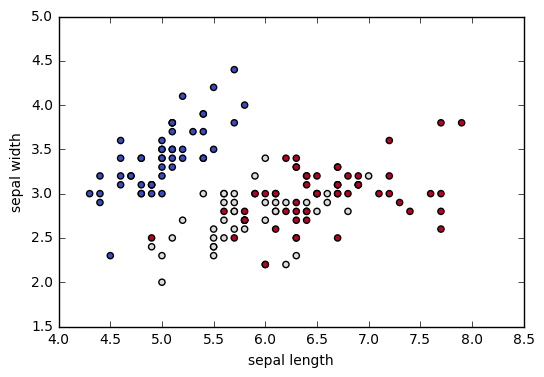

In [10]:
def visualize_sepal_data():
    iris=datasets.load_iris()
    x=iris.data[:, :2]
    y=iris.target
    plt.scatter(x[:, 0],x[: ,1],c=y,cmap=plt.cm.coolwarm)
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.show()
    
visualize_sepal_data()

In [16]:
iris=datasets.load_iris()
x=iris.data[:, :2]
y=iris.target
C=1.0

svc=svm.SVC(kernel='linear',C=C).fit(x,y)
lin_svc=svm.LinearSVC(C=C).fit(x,y)
rbf_svc =svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(x,y)
poly_svc =svm.SVC(kernel='poly',degree=3,C=C).fit(x,y)

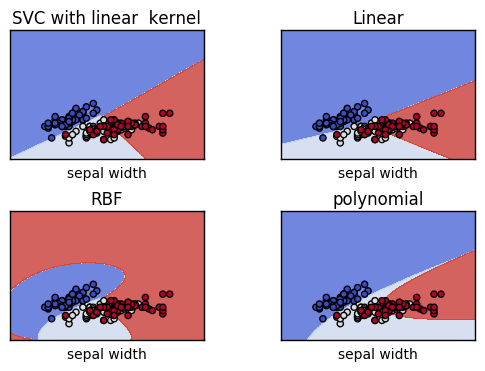

In [22]:
h=0.02
x_min,x_max=x[:, 0].min()-1,x[:, 0].max()+1
y_min,y_max=x[:, 1].min()-1,x[:, 0].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

titles=['SVC with linear  kernel',
        'Linear','RBF','polynomial']

for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.coolwarm,alpha=0.8)
    plt.scatter(x[:, 0],x[: ,1],c=y,cmap=plt.cm.coolwarm)
    plt.xlabel('sepal length')
    plt.xlabel('sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
plt.show()